In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat

%matplotlib inline
sns.set()

# To avoid Warning message inbetween ...
import warnings
warnings.filterwarnings('ignore')

### Load the datasets

In [3]:
# The dataset can be downloaded from the following shared google drive folder link
# https://drive.google.com/drive/folders/1ymyCnrFqha2wz5xdqMdZ2TZuSyjcdA4a?usp=sharing

company_tweet = pd.read_csv('./Datasets/kaggle_2015_2020_tweets/Company_Tweet.csv')
tweet = pd.read_csv('./Datasets/kaggle_2015_2020_tweets/Tweet.csv')
company = pd.read_csv('./Datasets/kaggle_2015_2020_tweets/Company.csv')
company_value = pd.read_csv('./Datasets/NASDAQ_kaggle/CompanyValues.csv')

In [4]:
# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Exploratory Data Analysis (EDA)

In [5]:
#Quick Analysis on Dataset : DataTypes, Rows and Columns ,Null values, Unique values ...
def quick_analysis(df):
    print("Data info:")
    print(df.info())
    print("-------------****----------------\n\nData Types:")
    print(df.dtypes)
    print("-------------****----------------\n\nRows and Columns:")
    print(df.shape)
    print("-------------****----------------\n\nColumn names:")
    print(df.columns)
    print("-------------****----------------\n\nNull Values:")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))
    print("-------------****----------------\n\nUnique values:")
    print(df.nunique())
    print("-------------****----------------\n\nDescribes:")
    print(df.describe())
    

In [6]:
def get_eda_features(df):
    #Visual Exploratory Data Analysis (EDA) And Your First Model
    #EDA on Feature Variables
    print(list(set(df.dtypes.tolist())))
    df_object = df.select_dtypes(include=["object"]).copy()
    df_int = df.select_dtypes(include=['int64']).copy()

    categorical = df_object.columns
    numerical = df_int.columns

    print("Datashape of Object Dataframe:",df_object.shape)
    print("Datashape of Interger Dataframe:",df_int.shape)
    return categorical, numerical

In [7]:
def univariate_analysis(df, categorical, row_num=1, col_num=2):
    fig,ax = plt.subplots(row_num,col_num, figsize=(20, 5*row_num))
    for variable,subplot in zip(categorical,ax.flatten()):
        sns.countplot(df[variable],ax=subplot)
        for label in subplot.get_xticklabels():
            label.set_rotation(20)

In [8]:
def univariate_analysis_on_numerial(df, numerical, row_num=1,col_num=2):
    df[numerical].hist(bins=50,figsize=(16 + (2*row_num),20),layout=(8, col_num))

In [9]:
def column_distplot(df, column_name, bins=50, describe=True):
    if describe:
        print(df[column_name].describe())
    plt.figure(figsize=(9, 8))
    sns.distplot(df[column_name], color='g', bins=bins, hist_kws={'alpha': 0.4});

#### Company dataset

Quick analysis

In [10]:
quick_analysis(company)
company.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticker_symbol  6 non-null      object
 1   company_name   6 non-null      object
dtypes: object(2)
memory usage: 224.0+ bytes
None
-------------****----------------

Data Types:
ticker_symbol    object
company_name     object
dtype: object
-------------****----------------

Rows and Columns:
(6, 2)
-------------****----------------

Column names:
Index(['ticker_symbol', 'company_name'], dtype='object')
-------------****----------------

Null Values:
ticker_symbol    0.0
company_name     0.0
dtype: float64
-------------****----------------

Unique values:
ticker_symbol    6
company_name     5
dtype: int64
-------------****----------------

Describes:
       ticker_symbol company_name
count              6            6
unique             6            5
top             AAPL   Google Inc
freq

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc


Because there are no any interger variable. So, we do not plot "Univariate Analysis on: Numerical Variables"

We just show categorical variables of Company dataset to obtain overview.

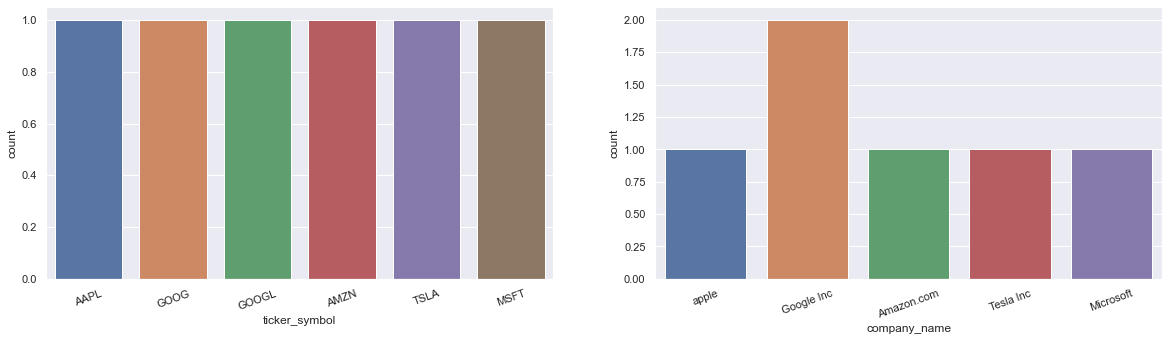

In [14]:
univariate_analysis(company, company_categorial, row_num=1, col_num=2)

**Comments**: Company dataset have 5 companies. The google Inc have two ticket symbol which are GOOG and GOOGL.

"GOOG and GOOGL are stock ticker symbols for Alphabet (the company formerly known as Google). ... The company created two classes of shares in April 2014. The reason for the split between the two classes of shares was to preserve the control of founders Larry Page and Sergey Brin."

Ref: https://www.investopedia.com/ask/answers/052615/whats-difference-between-googles-goog-and-googl-stock-tickers.asp#:~:text=GOOG%20and%20GOOGL%20are%20stock,company%20formerly%20known%20as%20Google


#### Company tweet

In [15]:
quick_analysis(company_tweet)
company_tweet

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4336445 entries, 0 to 4336444
Data columns (total 2 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
dtypes: int64(1), object(1)
memory usage: 66.2+ MB
None
-------------****----------------

Data Types:
tweet_id          int64
ticker_symbol    object
dtype: object
-------------****----------------

Rows and Columns:
(4336445, 2)
-------------****----------------

Column names:
Index(['tweet_id', 'ticker_symbol'], dtype='object')
-------------****----------------

Null Values:
tweet_id         0.0
ticker_symbol    0.0
dtype: float64
-------------****----------------

Unique values:
tweet_id         3717964
ticker_symbol          6
dtype: int64
-------------****----------------

Describes:
           tweet_id
count  4.336445e+06
mean   8.834282e+17
std    1.927735e+17
min    5.504415e+17
25%    7.185450e+17
50%    8.825934e+17
75%    1.054776e+18
max    1.212

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL
...,...,...
4336440,1212158772015034369,TSLA
4336441,1212159099632267268,TSLA
4336442,1212159184931717120,TSLA
4336443,1212159838882533376,TSLA


There are **4336445** tweets from companies which two column tweet_id and ticket_symbol.

**Attributes:**
* **tweet_id**: Id of tweet post on Twitter
* **ticker_symbol**: Symbol of comapany which is same with stock symbol of that company.

#### Company values
This dataset is presented price of stock of the companies.

In [16]:
quick_analysis(company_value)
company_value.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  17528 non-null  object 
 1   day_date       17528 non-null  object 
 2   close_value    17528 non-null  float64
 3   volume         17528 non-null  int64  
 4   open_value     17528 non-null  float64
 5   high_value     17528 non-null  float64
 6   low_value      17528 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 958.7+ KB
None
-------------****----------------

Data Types:
ticker_symbol     object
day_date          object
close_value      float64
volume             int64
open_value       float64
high_value       float64
low_value        float64
dtype: object
-------------****----------------

Rows and Columns:
(17528, 7)
-------------****----------------

Column names:
Index(['ticker_symbol', 'day_date', 'close_value', 'volume', 'open_

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


**Attributes:**
- **ticker_symbol**:
- **day_date**:
- **close_value**:

In [17]:
company_value_categorial, company_value_numerical = get_eda_features(company_value)

[dtype('float64'), dtype('int64'), dtype('O')]
Datashape of Object Dataframe: (17528, 2)
Datashape of Interger Dataframe: (17528, 1)


In [18]:
company_value_categorial

Index(['ticker_symbol', 'day_date'], dtype='object')

The "day_date" colume is not the categorial type. It is a datetime type. We will convert to datetime type later, but we will drop "day_date" colume for now to visulize data first.

In [19]:
company_value_categorial = company_value_categorial.drop("day_date")

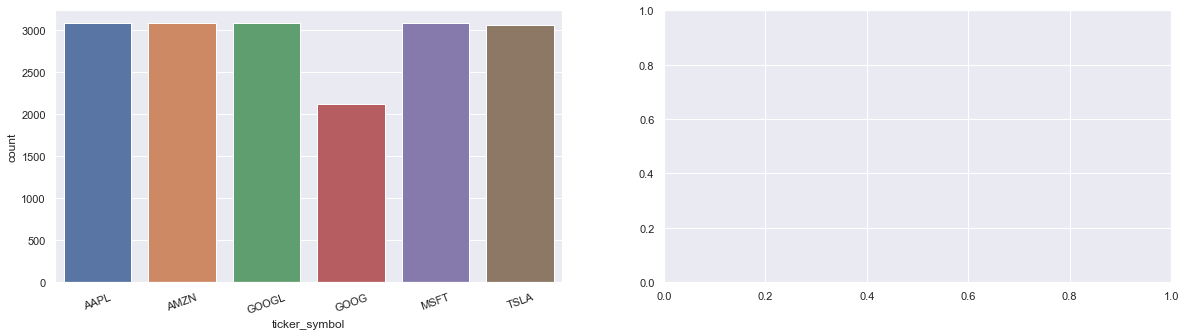

In [28]:
univariate_analysis(company_value, company_value_categorial, row_num=1, col_num=2)

In [29]:
company_value_numerical

Index(['volume'], dtype='object')

We just have a "volume" column which is numberial type. Let's check to get more information!

count    1.752800e+04
mean     2.025441e+07
std      3.322733e+07
min      7.932000e+03
25%      2.075086e+06
50%      4.835618e+06
75%      2.704358e+07
max      4.624423e+08
Name: volume, dtype: float64


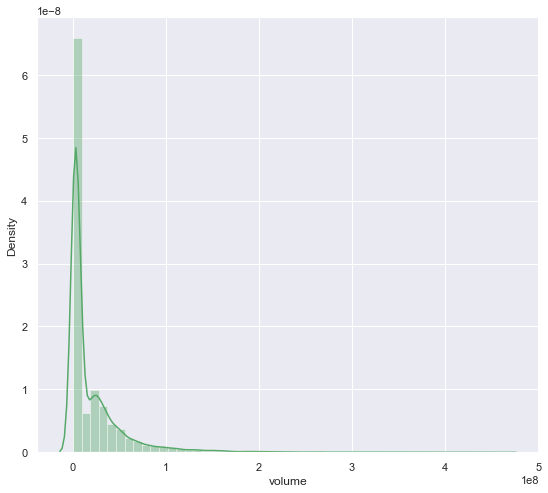

In [30]:
column_distplot(company_value, "volume")

With the above chart, we can see that the volume are skewed right and some outliers lies above ~ $2*10^8$.

#### Tweet dataset

In [31]:
# For get small data to testing
# tweet = tweet[:10000]

In [32]:
quick_analysis(tweet)
tweet.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   writer       object
 2   post_date    int64 
 3   body         object
 4   comment_num  int64 
 5   retweet_num  int64 
 6   like_num     int64 
dtypes: int64(5), object(2)
memory usage: 198.6+ MB
None
-------------****----------------

Data Types:
tweet_id        int64
writer         object
post_date       int64
body           object
comment_num     int64
retweet_num     int64
like_num        int64
dtype: object
-------------****----------------

Rows and Columns:
(3717964, 7)
-------------****----------------

Column names:
Index(['tweet_id', 'writer', 'post_date', 'body', 'comment_num', 'retweet_num',
       'like_num'],
      dtype='object')
-------------****----------------

Null Values:
tweet_id       0.000000
writer         0.012715
post_date      0.000000
body           0.000000

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


**Attributes**
- **id**:

We have "tweet_id" column in **tweet** dataset which is mapped to "tweet_id" in **company_tweet** dataset

In [33]:
tweet_categorial, tweet_numerical = get_eda_features(tweet)

[dtype('int64'), dtype('O')]
Datashape of Object Dataframe: (3717964, 2)
Datashape of Interger Dataframe: (3717964, 5)


In [34]:
tweet_categorial

Index(['writer', 'body'], dtype='object')

We do not visualize the overview of "writer" and "body" columns likes above due to they are not necessary.

But there are two information which need to know here. That are:
- How many writers tweet their posts?
- What is the average length of the sentences in each post?

In [35]:
tweet['writer'].describe()

count     3670691
unique     140131
top       App_sw_
freq        91741
Name: writer, dtype: object

We have **X** author with total post is **Y** posts. 

In [36]:
tweet['body'].str.split().str.len()

0          17
1          20
2          21
3          13
4          16
           ..
3717959    53
3717960    40
3717961    10
3717962     9
3717963    17
Name: body, Length: 3717964, dtype: int64

In [37]:
body_len = tweet['body'].str.split().str.len()
body_len.describe()

count    3.717964e+06
mean     1.758108e+01
std      9.618676e+00
min      1.000000e+00
25%      1.200000e+01
50%      1.500000e+01
75%      2.100000e+01
max      6.800000e+01
Name: body, dtype: float64

<AxesSubplot: >

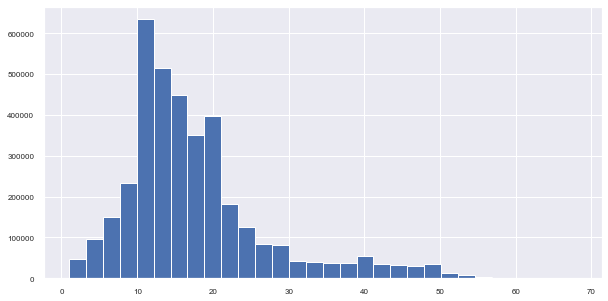

In [38]:
body_len.hist(figsize=(10, 5), bins=30, xlabelsize=8, ylabelsize=8)

So the average length of the sentences is **X** words.

Next we will explore the numberial type column of dataset.

In [39]:
tweet_numerical

Index(['tweet_id', 'post_date', 'comment_num', 'retweet_num', 'like_num'], dtype='object')

We will ignore "tweet_id", "post_date" columns.

In [40]:
tweet_numerical = tweet_numerical.drop(['tweet_id'])

tweet_numerical

Index(['post_date', 'comment_num', 'retweet_num', 'like_num'], dtype='object')

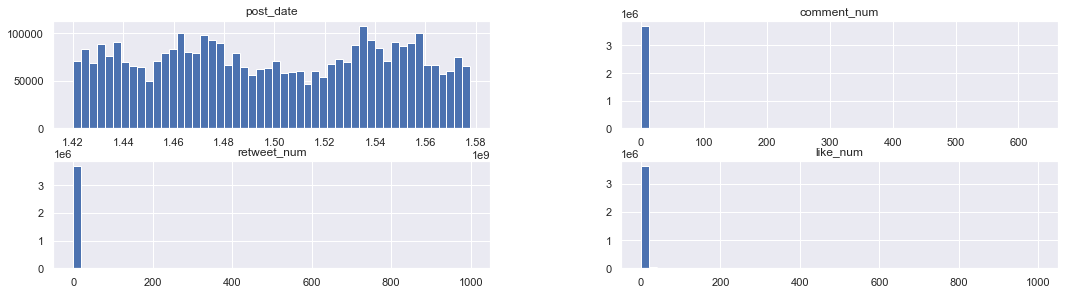

In [41]:
univariate_analysis_on_numerial(tweet, tweet_numerical)

**Comments**

# Preprocessing

**Describtion:**


### Data Manipulation in the Dataset
We will keep two dataset which are **company_value** and **tweet** dataframe. And we will merge **company_tweet** and **tweet** dataframe via *tweet_id* to new dataframe which is **tweet_df** dataframe.


#### Tweet dataset

In [42]:
tweet_df = pd.merge(company_tweet , tweet , on="tweet_id", how= "inner")
tweet_df.head(5)

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


In [43]:
company_value.head(5)

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


With **company_value** and **tweet_df** dataframe, we will join them by "ticker_symbol" column with "post_date" in **tweet_df** and "day_date" in **company_value** correspondingly when analyzing.

**Total engangement**

We suppose that total of comment number, retweet number, and like number shows the impact of that tweet on the community. Because only influential articles can affect the stock price of that company. 

So we will add all total of comment, number, and like to a new column which has a new name **total_engangement**.

In [44]:
tweet_df["total_engangement"] = tweet_df["comment_num"] + tweet_df["retweet_num"] + tweet_df["like_num"]

We will plot the histogram of total engagement on tweets and filter the low-impact tweet.

count    4.336445e+06
mean     3.030775e+00
std      1.901432e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.703000e+03
Name: total_engangement, dtype: float64


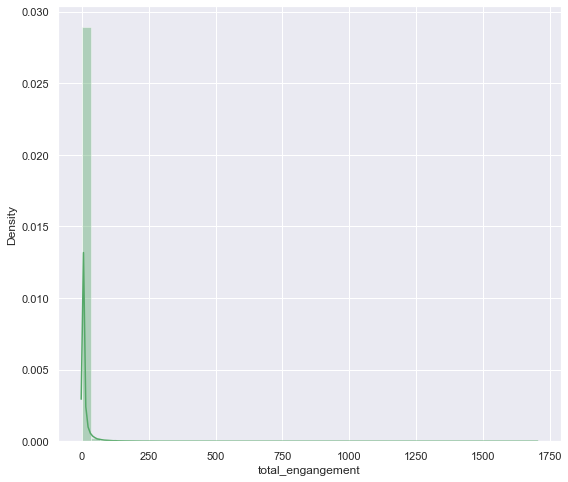

In [45]:
column_distplot(tweet_df, column_name="total_engangement")

To obtain high-impact tweets, we will drop rows which has a value less than **engangement_threshold** count. 

**engagement_threshold** is a heuristic parameter that we chose.

In [46]:
engagement_threshold = 40

In [47]:
tweet_df = tweet_df[tweet_df["total_engangement"] > engagement_threshold]

**Day date**

Converting "post_date" in *tweet_df* and "day_date" in *company_value* to datetime type

In [48]:
tweet_df['post_date'] = pd.to_datetime(tweet_df['post_date'], unit='s')

Because we just care about day of post then compare with stock data in day. So we will get create new columne which names "day_date".

In [49]:
tweet_df['day_date'] = pd.to_datetime(tweet_df['post_date'].apply(lambda date: date.date()))

In [50]:
tweet_df = tweet_df.sort_values(by="day_date")

#### Company value dataset

In [51]:
stock_df = company_value

stock_df['day_date']  = pd.to_datetime(stock_df['day_date'])

stock_df.sample(5)

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
15040,TSLA,2018-02-12,315.7300,6224479,316.1300,318.0800,306.2500
3703,AMZN,2017-12-12,1165.0800,2208812,1166.5100,1173.6000,1161.6100
6590,GOOGL,2018-09-26,1194.0600,1874062,1193.6900,1207.2400,1185.3969
8642,GOOGL,2010-08-03,247.4351,1802131,247.7736,248.7637,245.8843
10648,GOOG,2014-11-13,545.3800,1334367,549.8000,549.8000,543.4800


We only keep the value of company_value if it is greater than start_day and less than end_day of tweet_df

In [52]:
start_day = min(tweet_df['day_date'])
print(f"Start day: {start_day}")

end_day = max(tweet_df['day_date'])
print(f"End day: {end_day}")

Start day: 2015-01-01 00:00:00
End day: 2019-12-31 00:00:00


In [53]:
stock_df = stock_df[(stock_df['day_date'] >= start_day) & (stock_df['day_date'] <= end_day)]

stock_df needs to sort by "day_date"

In [54]:
stock_df = stock_df.sort_values(by="day_date")

### Data cleaning

- We will drop some column which are "post_date", "tweet_id", "comment_num", "retweet_num", and "like_num". Because we do not use it anymore.

In [55]:
tweet_df = tweet_df.drop(['tweet_id', 'post_date', 'comment_num', 'retweet_num', 'like_num'], axis=1)

Dataset after cleaning like this:

In [56]:
print(tweet_df.info())
print()
tweet_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54440 entries, 40 to 4336399
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ticker_symbol      54440 non-null  object        
 1   writer             53902 non-null  object        
 2   body               54440 non-null  object        
 3   total_engangement  54440 non-null  int64         
 4   day_date           54440 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.5+ MB
None



,ticker_symbol,writer,body,total_engangement,day_date
4245668,TSLA,bgrahamdisciple,So who has the over on a $2 billion 2019 loss ...,50,2019-09-13
4047135,TSLA,TESLAcharts,Happening now on @CNBC / $TSLA:Colin Rusch - T...,51,2019-02-26
3196218,MSFT,paulstorms,Don't look now... $MSFT is approaching an all-...,43,2016-08-08
3716976,TSLA,ThinkFinance999,"One thing $TSLA could do to improve cash flow,...",55,2018-04-05
4317530,TSLA,BradMunchen,Fun fact: $TSLA is not even the best EV maker ...,232,2019-12-12


In [57]:
print(stock_df.info())
print()
stock_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10956 entries, 2517 to 103
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ticker_symbol  10956 non-null  object        
 1   day_date       10956 non-null  datetime64[ns]
 2   close_value    10956 non-null  float64       
 3   volume         10956 non-null  int64         
 4   open_value     10956 non-null  float64       
 5   high_value     10956 non-null  float64       
 6   low_value      10956 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 684.8+ KB
None



,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
11099,GOOG,2017-07-16,955.99,1052855,952.00,956.9100,948.005
1171,AAPL,2015-10-02,110.38,57774940,108.01,111.0136,107.550
9983,GOOG,2017-07-07,918.59,1590456,908.85,921.5400,908.850
14035,MSFT,2016-03-25,54.21,18967510,53.84,54.3300,53.730
173,AAPL,2019-09-20,217.73,57977090,221.38,222.5600,217.473


#### Text preprocessing for Body tweet in tweet_df

There are many text preprocessing which is produced data input for next step such likes Machine learning task.
* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming
* Lemmatization

But in this project, we only use the lowercase processing. Because we will use Affin algorithm which has text processing itself and use the whole sentences to gain sentiment score.

In [58]:
import nltk                             
# from nltk.corpus import twitter_samples                            
# from nltk.corpus import stopwords 
# from nltk.stem import PorterStemmer
# from nltk.tokenize import TweetTokenizer  

import random  
import re                     
import string

# nltk.download('stopwords')

In [59]:
tweets = tweet_df["body"]
tweets

40         This is Wall Street's top pick in 2015. Hint: ...
47         See how tech companies like Apple, Twitter and...
242        Top Stock Analyst Releases Report on Top Stock...
243        Analyst Report on Top Stock Market Options for...
244        Analyst Report on Top Stock Market Options for...
                                 ...                        
4335656    Not some conspiracy theory, btw. @PlainSite pu...
4335644    Tesla China-Made Model 3 has reached over 1,50...
4335624    Repeat after me: $TSLA is the only company in ...
4335587    ‘Save Clips on Honk’ function records a flying...
4336399    $TSLA Interesting...$93M trade after hours!Whe...
Name: body, Length: 54440, dtype: object

##### Remove hyperlinks, Twitter marks and styles


In [60]:
def remove_special_character(tweet):
#     print(tweet)
    # remove the old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags. only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # remove single numeric terms in the tweet. 
    tweet = re.sub(r'[0-9]', '', tweet)
    
    return tweet

In [61]:
tweet_df["tweet"] = tweet_df["body"].apply(lambda tweet: remove_special_character(tweet))

##### Convert to lowercase
We will also convert all words to lowercase.

In [62]:
tweet_df["tweet"] = tweet_df["tweet"].str.lower()

In [63]:
tweet_df[["body", "tweet"]].sample(10)

,body,tweet
3921413,Am considering holding all of my $TSLA short e...,am considering holding all of my $tsla short e...
4001302,Mystery solved.$TSLA,mystery solved.$tsla
4053701,$TSLA’s Falling Prices.It all comes down to ef...,$tsla’s falling prices.it all comes down to ef...
3814238,Pictured: Elon watching after hours action on ...,pictured: elon watching after hours action on ...
4257692,This guy is the biggest idiot in the Tesla com...,this guy is the biggest idiot in the tesla com...
3829259,Think @CNBC cares about stock manipulation? Th...,think @cnbc cares about stock manipulation? th...
1401383,08/07/18 - View today's #MarketOutlook from @M...,// - view today's marketoutlook from @market_s...
4166716,"FWIW, I believe one of the reasons more Robinh...","fwiw, i believe one of the reasons more robinh..."
3806876,$FB has lost about twice the total market cap ...,$fb has lost about twice the total market cap ...
4116034,$TSLACc @MelissaLeeCNBC @Lebeaucarnews @andre...,$tslacc @melissaleecnbc @lebeaucarnews @andre...


---------------------

# Model Building
* Choosing model
* Training model
* Evaluating result

## Afinn
Afinn is the simplest yet popular lexicons used for sentiment analysis developed by Finn Årup Nielsen. It contains 3300+ words with a polarity score associated with each word. In python, there is an in-built function for this lexicon.

In [65]:
from afinn import Afinn
afinn = Afinn()

In [66]:
tweet_df['afinn_score'] = tweet_df['tweet'].apply(lambda tweet: afinn.score(tweet))
tweet_df['afinn_score'].sample(5)

4041418    1.0
4124801    3.0
2357701    0.0
858338     0.0
4064880   -3.0
Name: afinn_score, dtype: float64

### Vader Sentiment

In [67]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vanderSentimentAnalyzer = SentimentIntensityAnalyzer()

In [68]:
def getVanderScore(tweet):    
    vs = vanderSentimentAnalyzer.polarity_scores(tweet)
    score = vs['compound']
    return score

def getVanderSentiment(score):    
    if (score >= 0.05): 
        return "Positive"
    
    elif (score < 0.05 and score > -0.05):
        return "Neutral"
    
    elif (score <= -0.05):    
        return "Negative"
    
    return score

In [69]:
tweet_df['vander_score'] = tweet_df['body'].apply(lambda tweet: getVanderScore(tweet))
tweet_df['vander_sentiment'] = tweet_df['vander_score'].apply(lambda score: getVanderSentiment(score))
tweet_df[['ticker_symbol', 'day_date', 'vander_score', 'vander_sentiment']].sample(10)

,ticker_symbol,day_date,vander_score,vander_sentiment
3053324,AMZN,2019-06-07,0.7394,Positive
3375225,MSFT,2019-11-27,0.0000,Neutral
4223381,TSLA,2019-08-06,0.1531,Positive
2984260,AMZN,2018-11-07,0.0000,Neutral
4098760,TSLA,2019-04-05,-0.1371,Negative
3558204,TSLA,2016-12-28,0.0000,Neutral
4244565,TSLA,2019-09-12,-0.1901,Negative
3819185,TSLA,2018-08-03,0.2732,Positive
4025505,TSLA,2019-01-30,0.0000,Neutral
1273322,AAPL,2018-03-01,0.8873,Positive


Sentiment score of apple


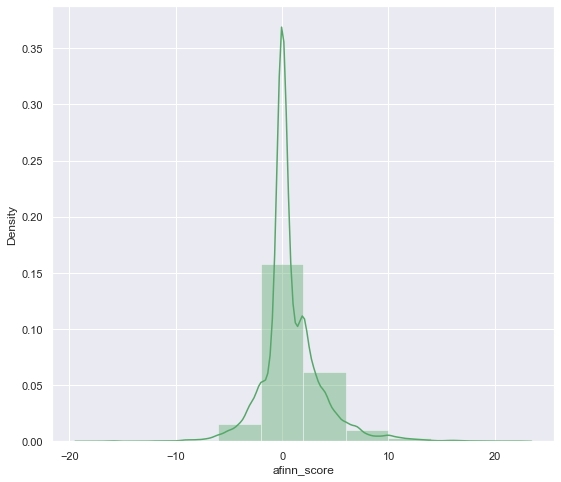

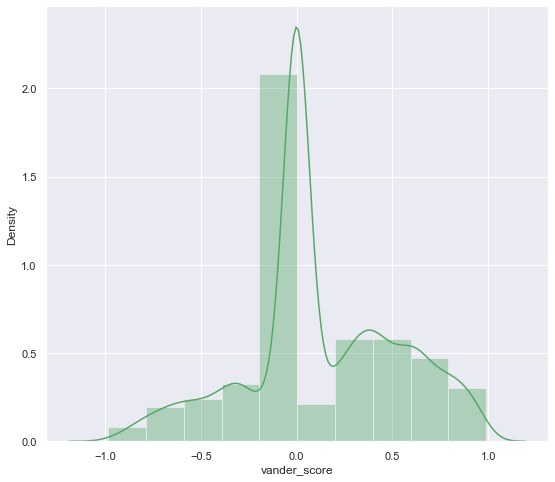



--------------


Sentiment score of Amazon.com


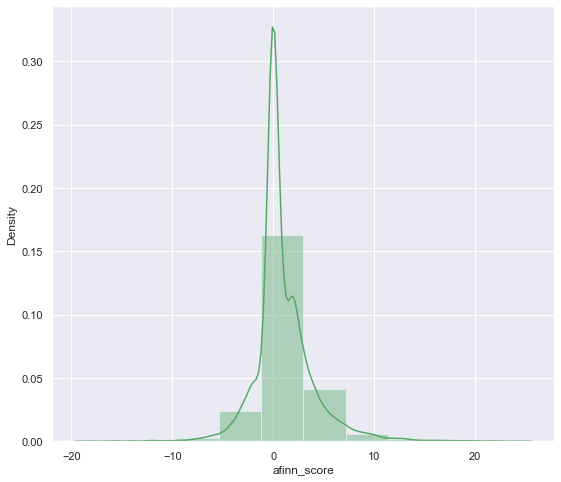

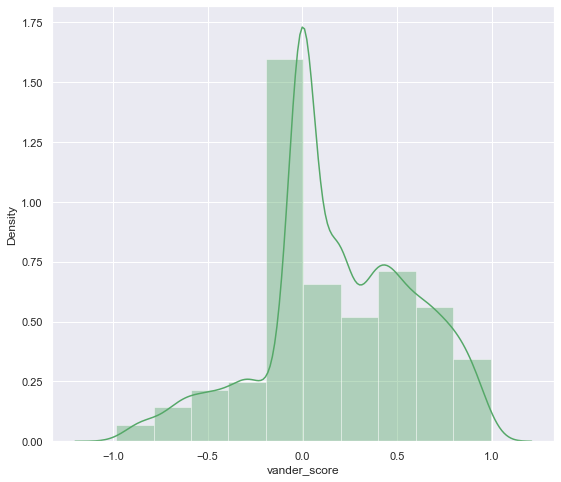



--------------


Sentiment score of Google Inc


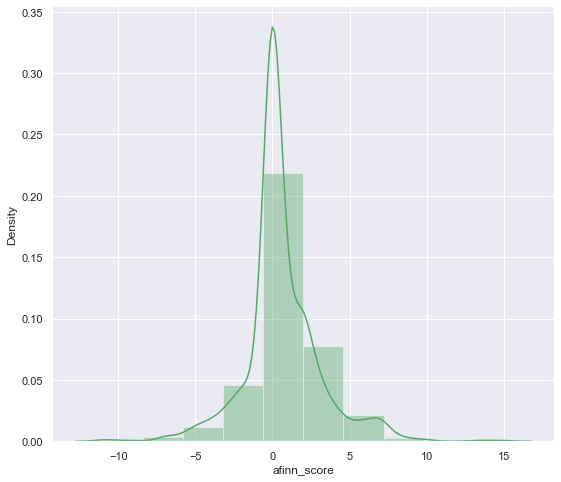

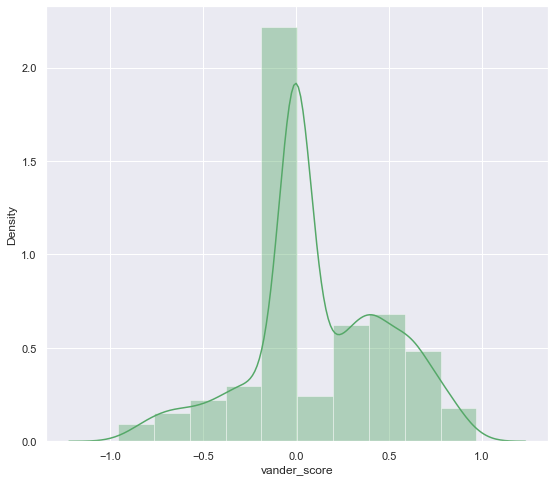



--------------


Sentiment score of Google Inc


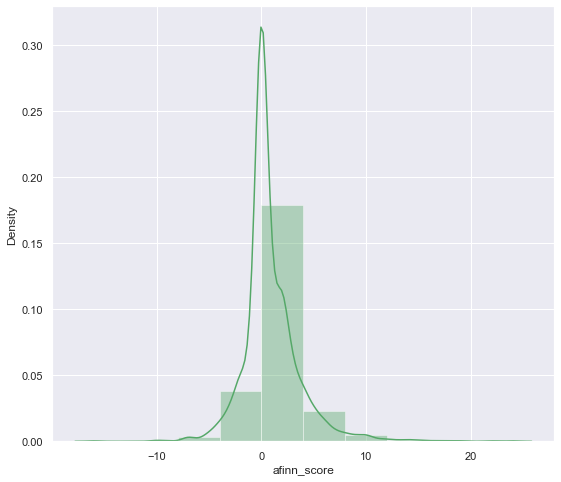

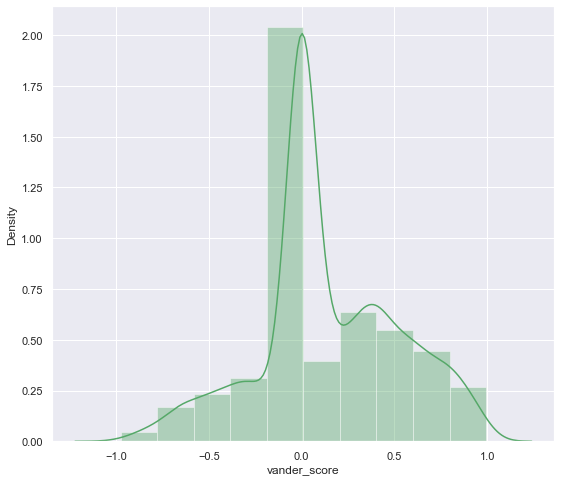



--------------


Sentiment score of Microsoft


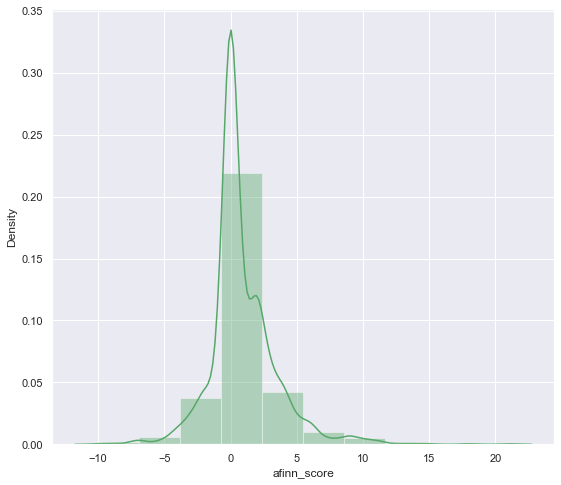

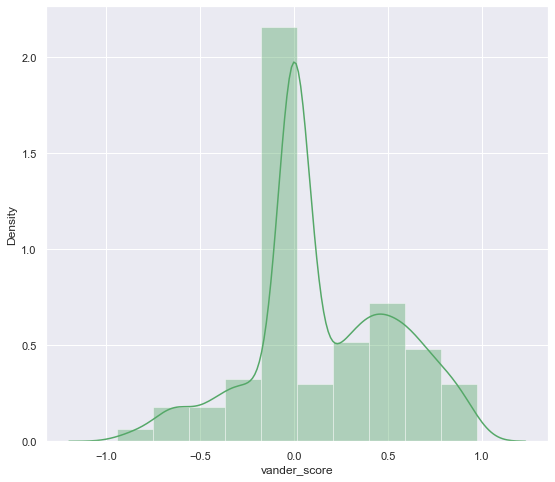



--------------


Sentiment score of Tesla Inc


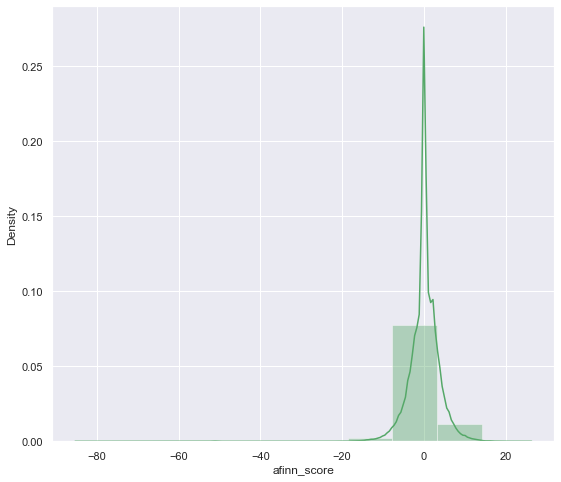

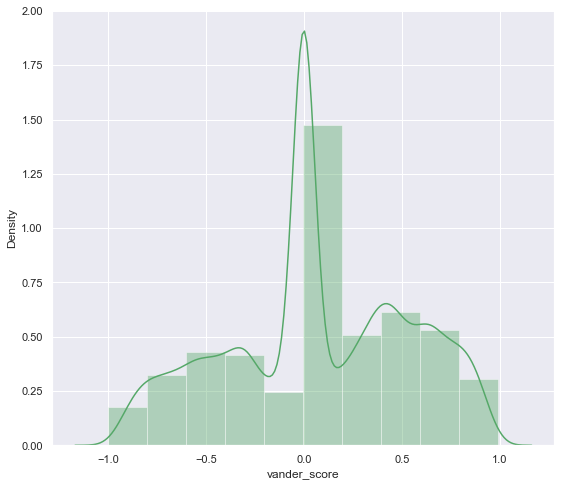



--------------




In [81]:
import time

for ticker_symbol in tweet_df["ticker_symbol"].unique():
    
    company_name = company[company["ticker_symbol"] == ticker_symbol]["company_name"].iloc[0]
    print(f"Sentiment score of {company_name}")
    sub_tweet_df = tweet_df[tweet_df["ticker_symbol"] == ticker_symbol]
    
    column_distplot(sub_tweet_df, column_name="afinn_score", bins=10, describe=False)
    column_distplot(sub_tweet_df, column_name="vander_score", bins=10, describe=False)
    plt.show()
    print("\n\n--------------\n\n")


**Sentiment overtime function**

This function will plot sentiment score with stock price of a company. It can bring some insight information from chart.

In [78]:
def sentiment_overtime(tweet_df, stock_df, title, score_column_name="score"):
    print("\n\n")
    fig = plt.figure(figsize=(24,10))
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()
    
    ax1.vlines(tweet_df['day_date'], 0, tweet_df[score_column_name]) 
    ax1.axhline(y=0, color='r', linestyle='-')

    
    ax2.plot(stock_df['day_date'], stock_df['close_value'], color='orange', label='Stock price')
    ax2.set_title("Effects of " + title +" tweets to stock price")
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    
    ax1.set_xlabel('Day date')
    ax1.set_ylabel('Sentiment Afinn score', color="blue")
    
    ax2.legend(lines + lines2, labels + labels2, loc=0)
        
    plt.show()

In [72]:
ticker_symbols =  tweet_df["ticker_symbol"].unique()

In [79]:
def draw_stock_price_with_sentiment(tweet_df, stock_df, start_day, end_day, score_name="score"):
    for ticker_symbol in ticker_symbols:
        print(f"Ticker symbol: {ticker_symbol}")

        sub_company = company[company["ticker_symbol"] == ticker_symbol]["company_name"]
        if len(sub_company) != 1:
            continue

        company_name = sub_company.iloc[0]

        print(f"Stock price of {company_name} company with ticker symbol is {ticker_symbol}")

        sub_tweet_df = tweet_df[tweet_df["ticker_symbol"] == ticker_symbol]
        sub_tweet_df = sub_tweet_df[(sub_tweet_df["day_date"]>=pd.to_datetime(start_day)) & (sub_tweet_df["day_date"]<=pd.to_datetime(end_day))]
        sub_stock_df = stock_df[stock_df["ticker_symbol"] == ticker_symbol]
        sub_stock_df = sub_stock_df[(sub_stock_df["day_date"]>=pd.to_datetime(start_day)) & (sub_stock_df["day_date"]<=pd.to_datetime(end_day))]

        sentiment_overtime(sub_tweet_df, sub_stock_df, company_name, score_column_name=score_name)

Ticker symbol: AAPL
Stock price of apple company with ticker symbol is AAPL





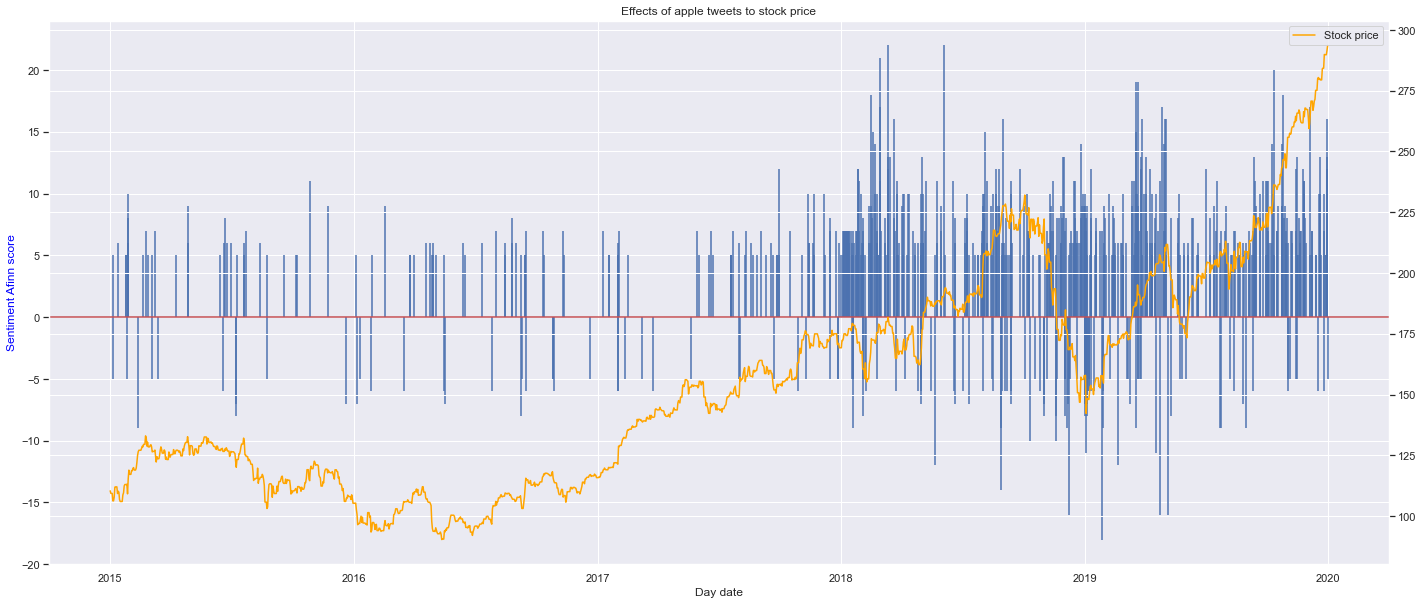

Ticker symbol: AMZN
Stock price of Amazon.com company with ticker symbol is AMZN





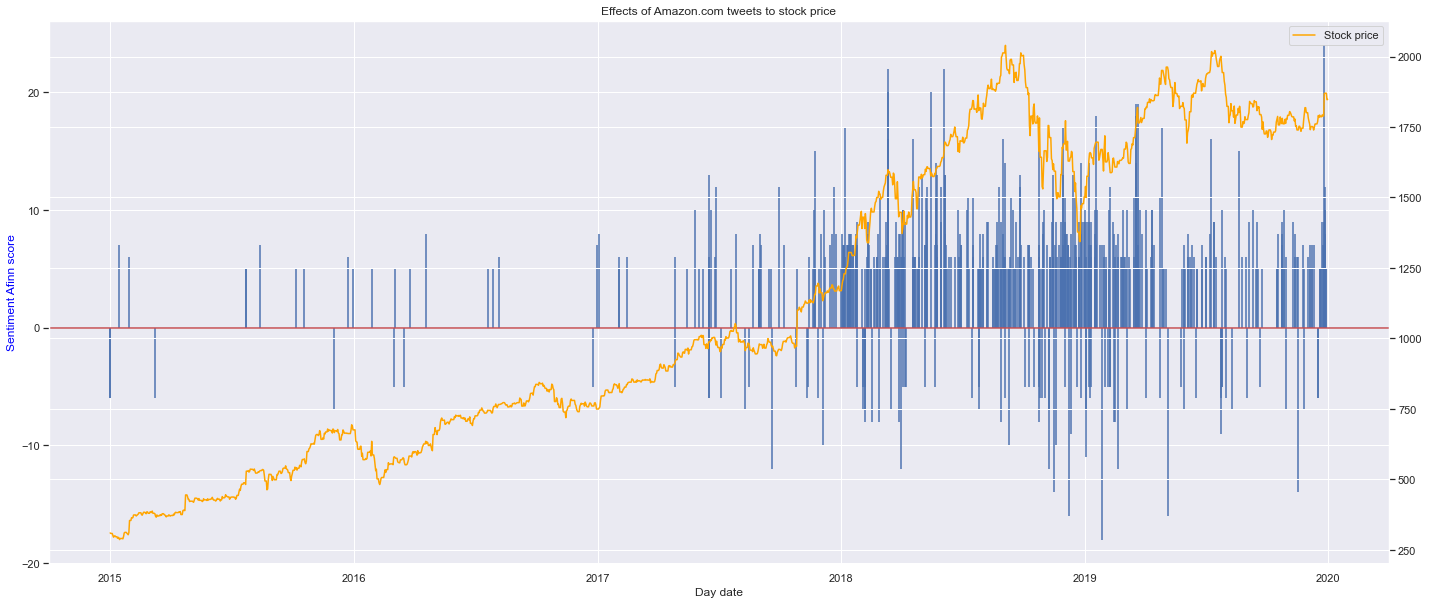

Ticker symbol: GOOG
Stock price of Google Inc company with ticker symbol is GOOG





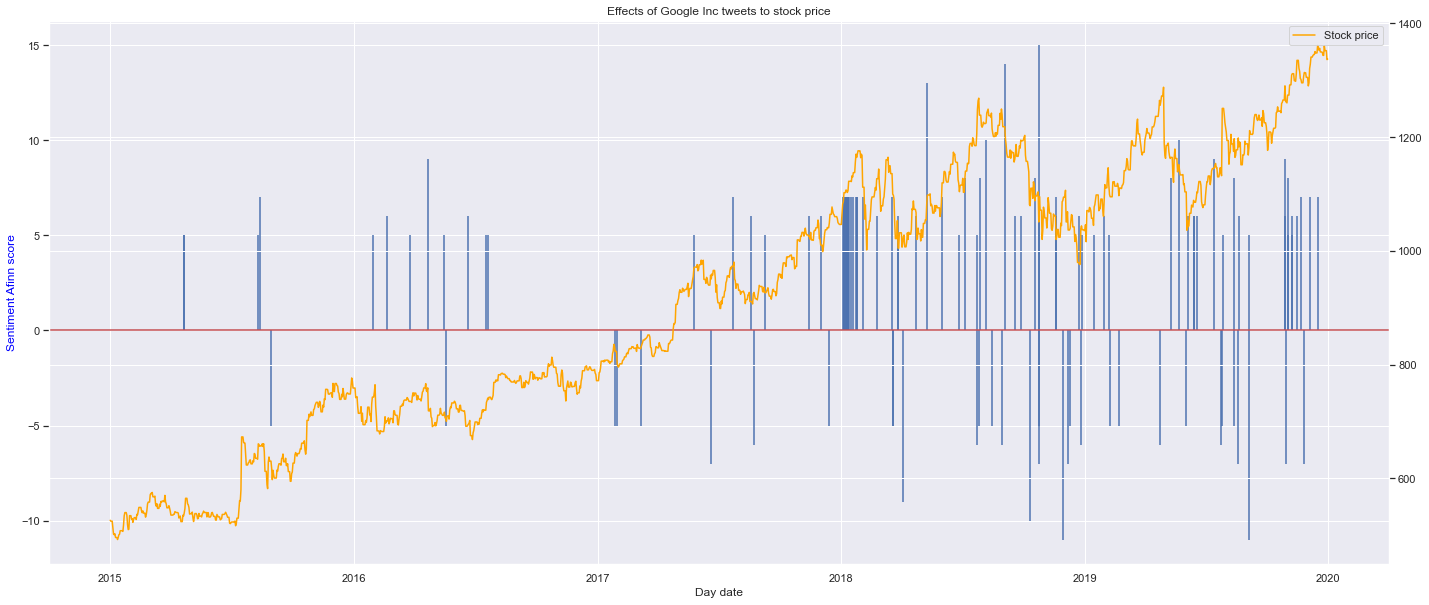

Ticker symbol: GOOGL
Stock price of Google Inc company with ticker symbol is GOOGL





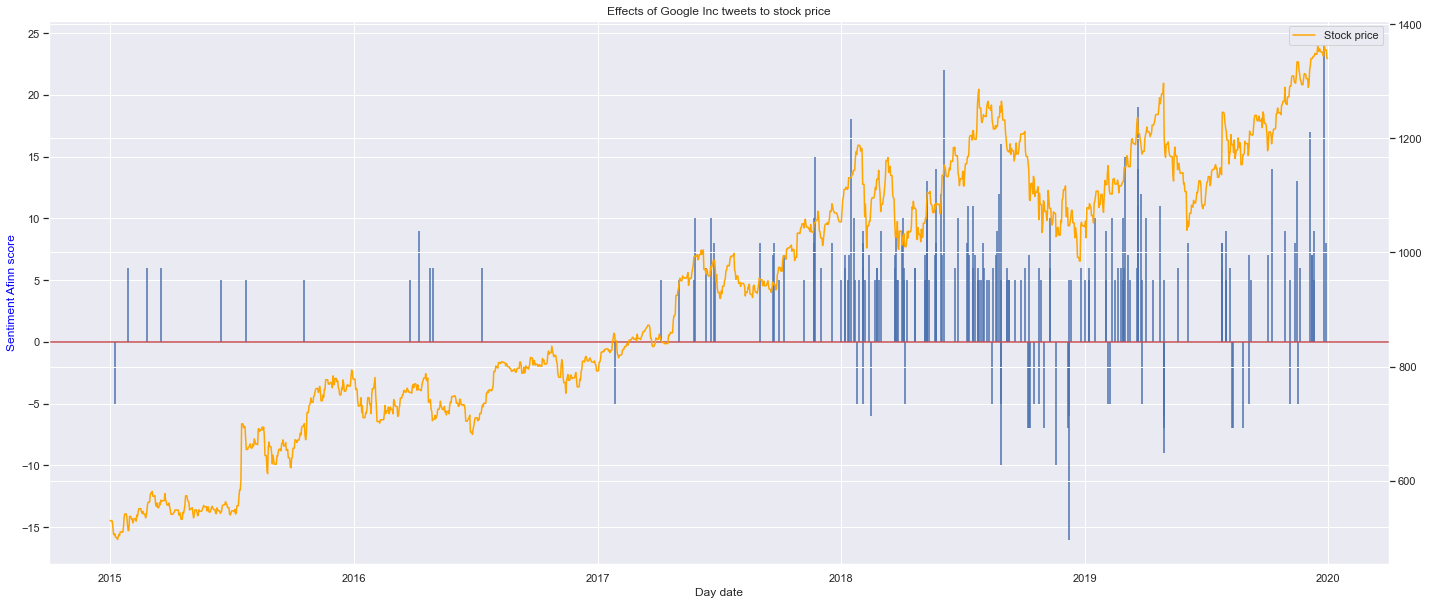

Ticker symbol: MSFT
Stock price of Microsoft company with ticker symbol is MSFT





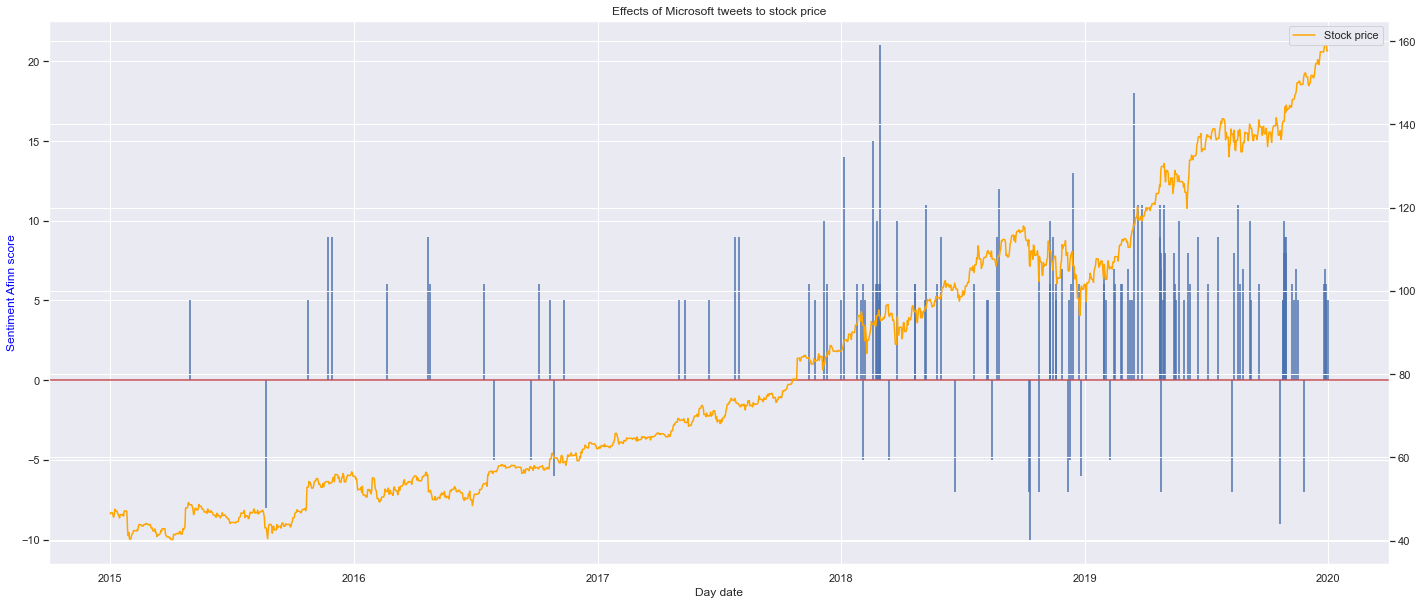

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





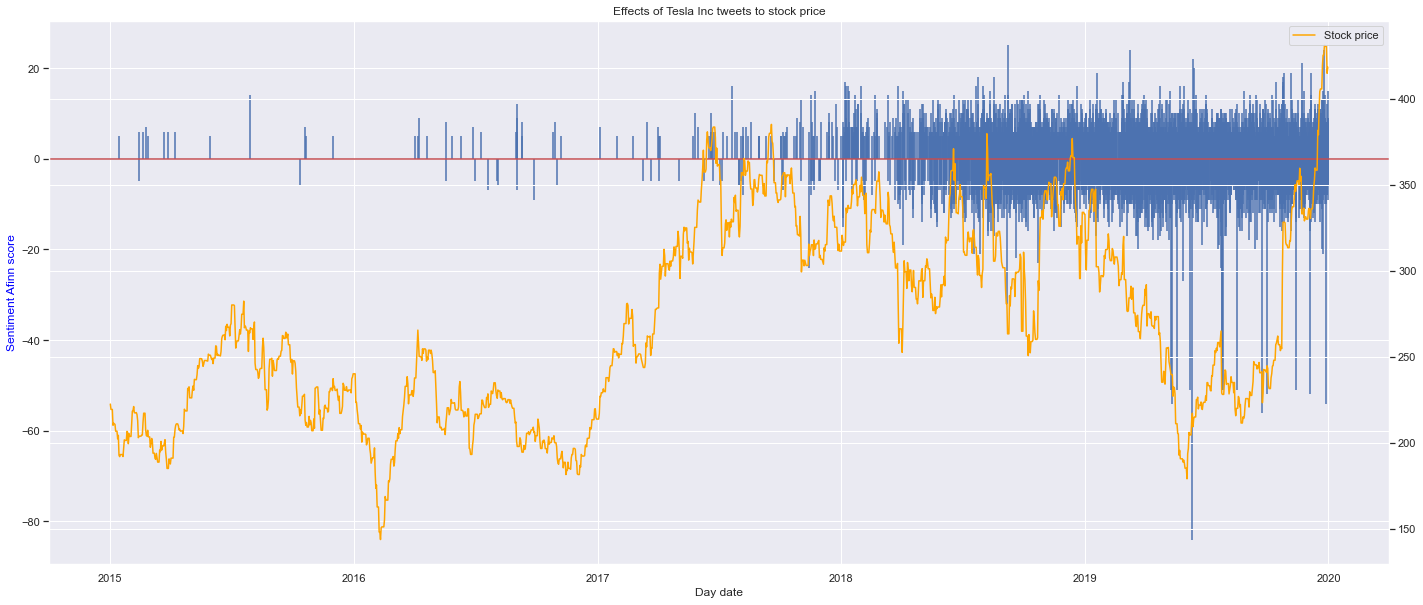

In [80]:
score_threshold = 5
tmp_tweet_df = tweet_df[(tweet_df['afinn_score']<=-score_threshold) | (tweet_df['afinn_score']>=score_threshold)]

draw_stock_price_with_sentiment(tmp_tweet_df, stock_df,start_day= min(stock_df['day_date']), end_day= max(stock_df['day_date']), score_name="afinn_score")


Because the overview of chart is hard to give us useful information. So we will zoom to in specific time.



### Draw chart

Set a specific time range

In [75]:
start_day = "2019-6-1"
end_day = "2020-1-1"

#### Afinn algorithm

Ticker symbol: AAPL
Stock price of apple company with ticker symbol is AAPL





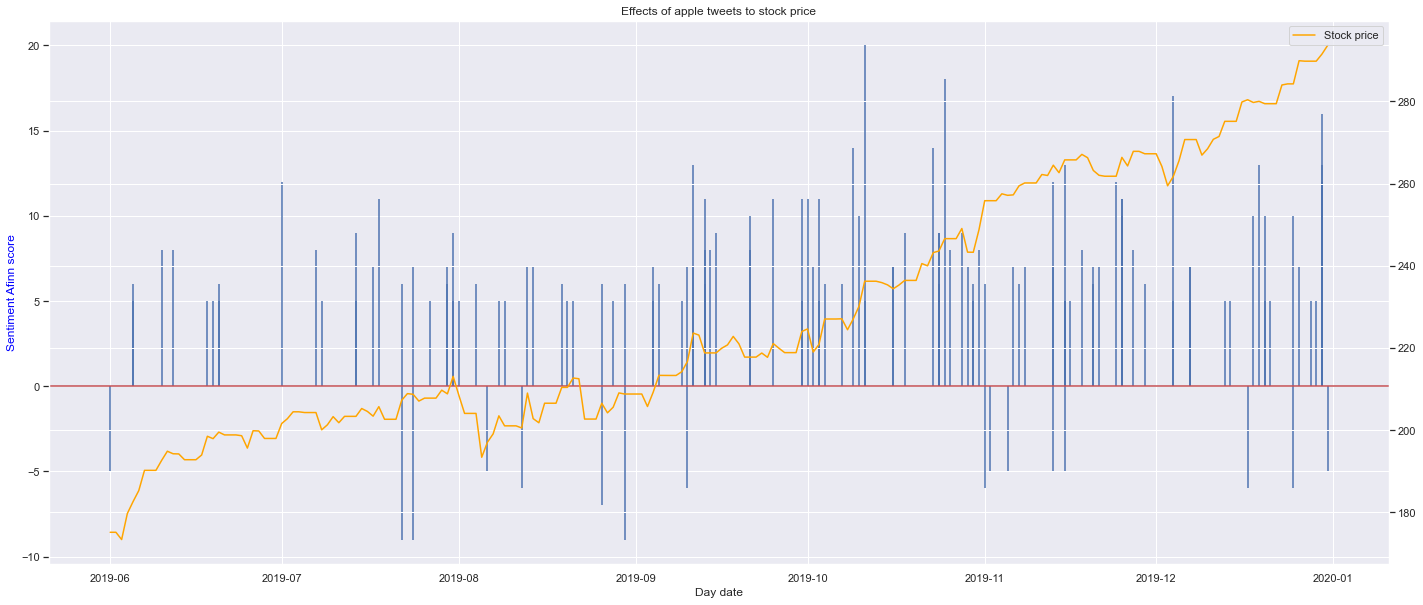

Ticker symbol: AMZN
Stock price of Amazon.com company with ticker symbol is AMZN





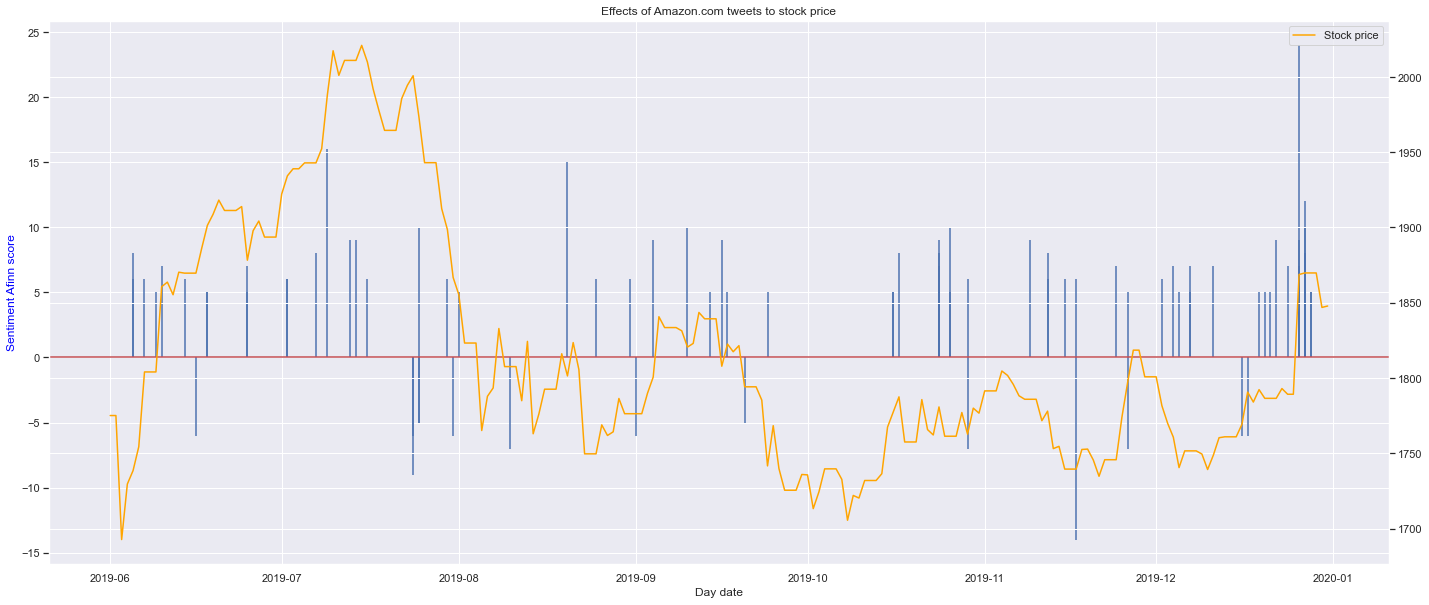

Ticker symbol: GOOG
Stock price of Google Inc company with ticker symbol is GOOG





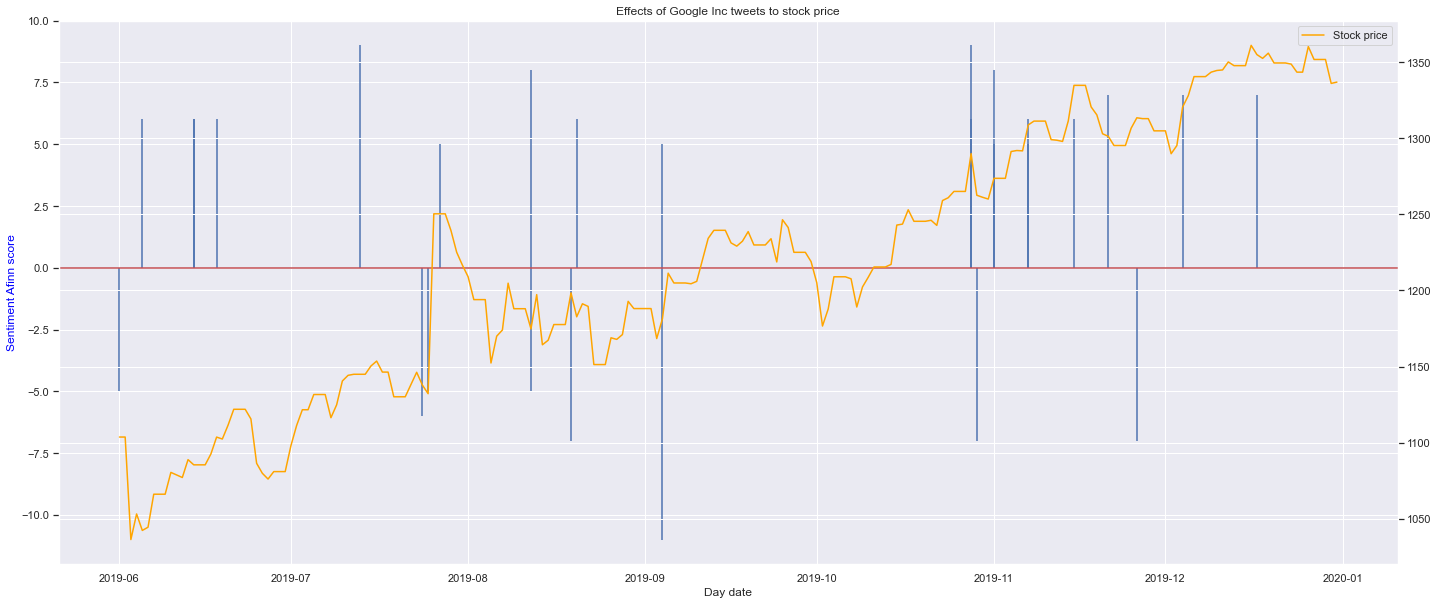

Ticker symbol: GOOGL
Stock price of Google Inc company with ticker symbol is GOOGL





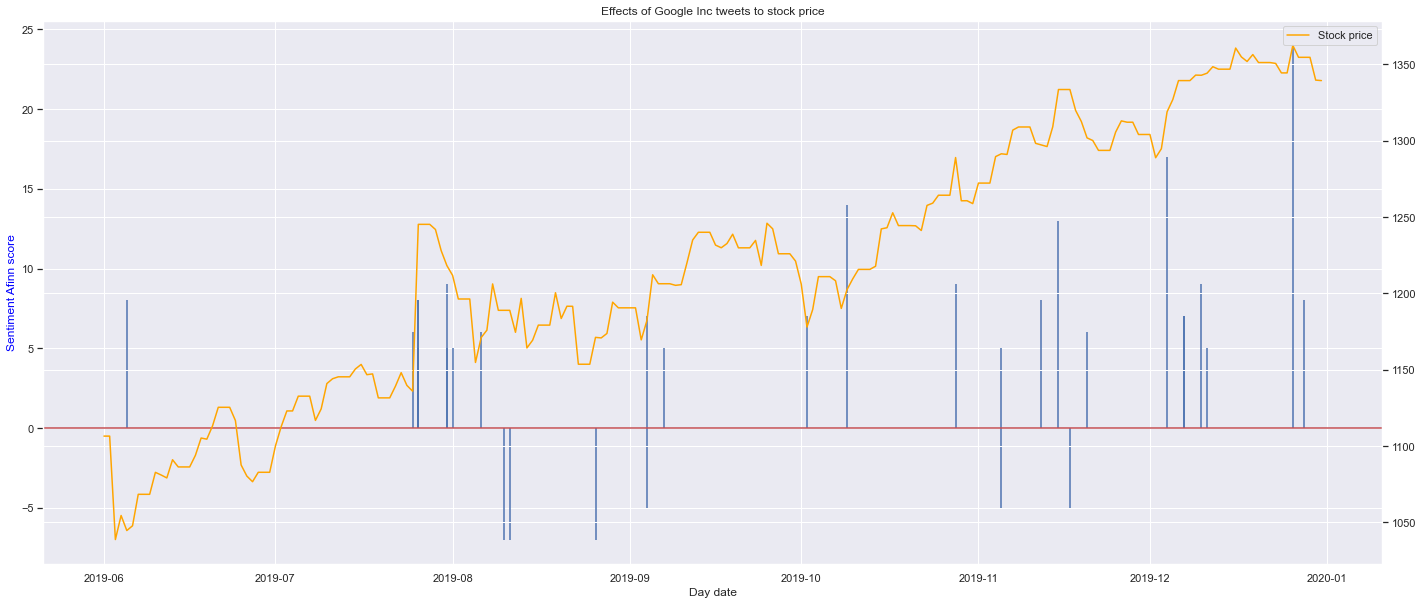

Ticker symbol: MSFT
Stock price of Microsoft company with ticker symbol is MSFT





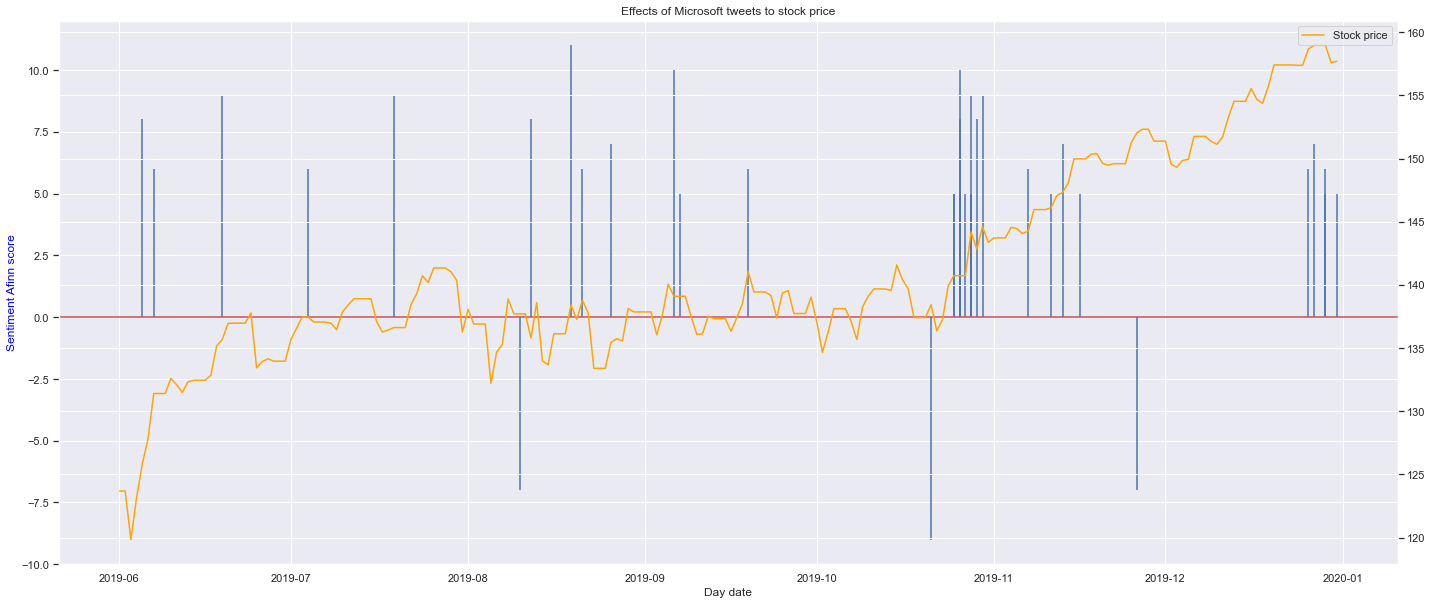

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





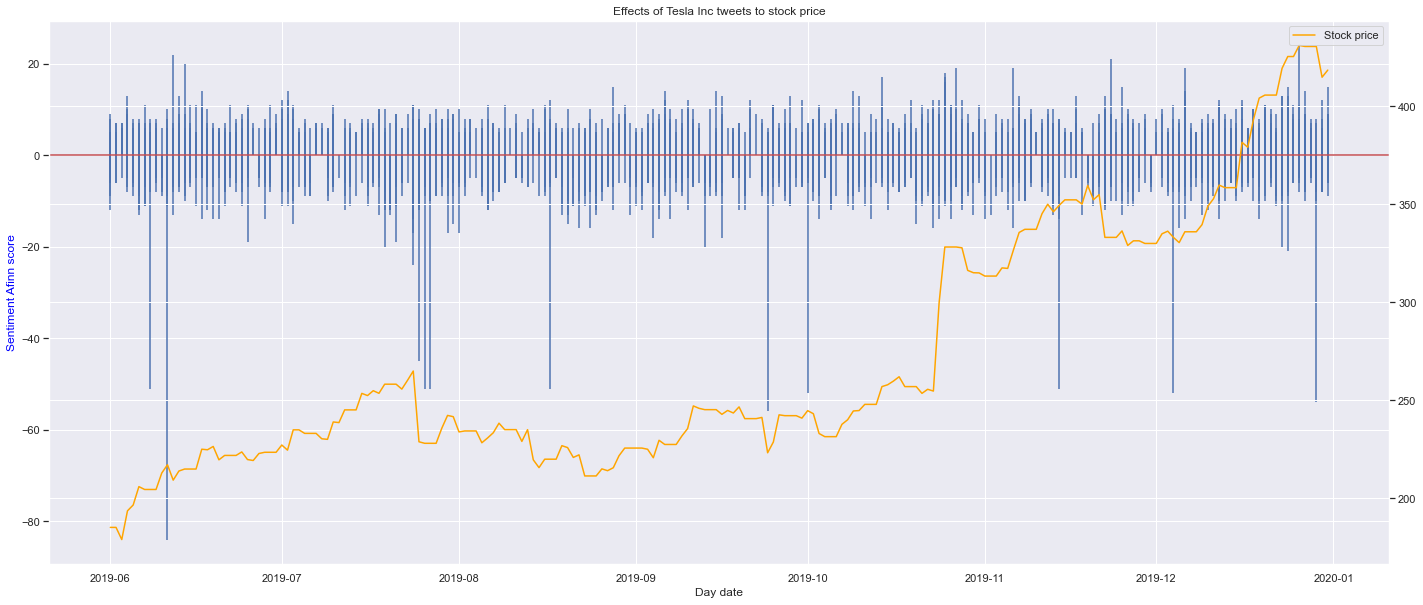

In [76]:
score_threshold = 5
tmp_tweet_df = tweet_df[(tweet_df['afinn_score']<=-score_threshold) | (tweet_df['afinn_score']>=score_threshold)]
draw_stock_price_with_sentiment(tmp_tweet_df, stock_df, start_day,end_day, score_name="afinn_score")

#### Vander algorithm

Before draw chart with Vander score. We will filter all score in range [-0.05, 0.05]. Because we consider the vander score in that range is neutral which is not affect to stock price.

Ticker symbol: AAPL
Stock price of apple company with ticker symbol is AAPL





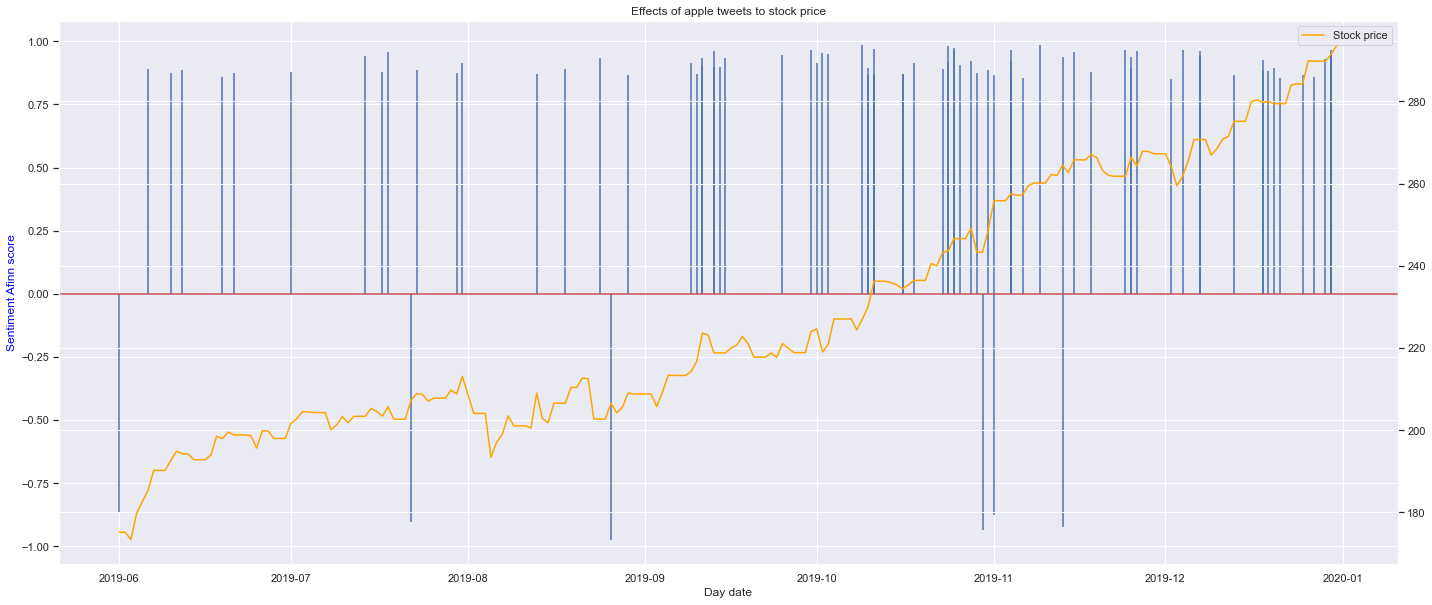

Ticker symbol: AMZN
Stock price of Amazon.com company with ticker symbol is AMZN





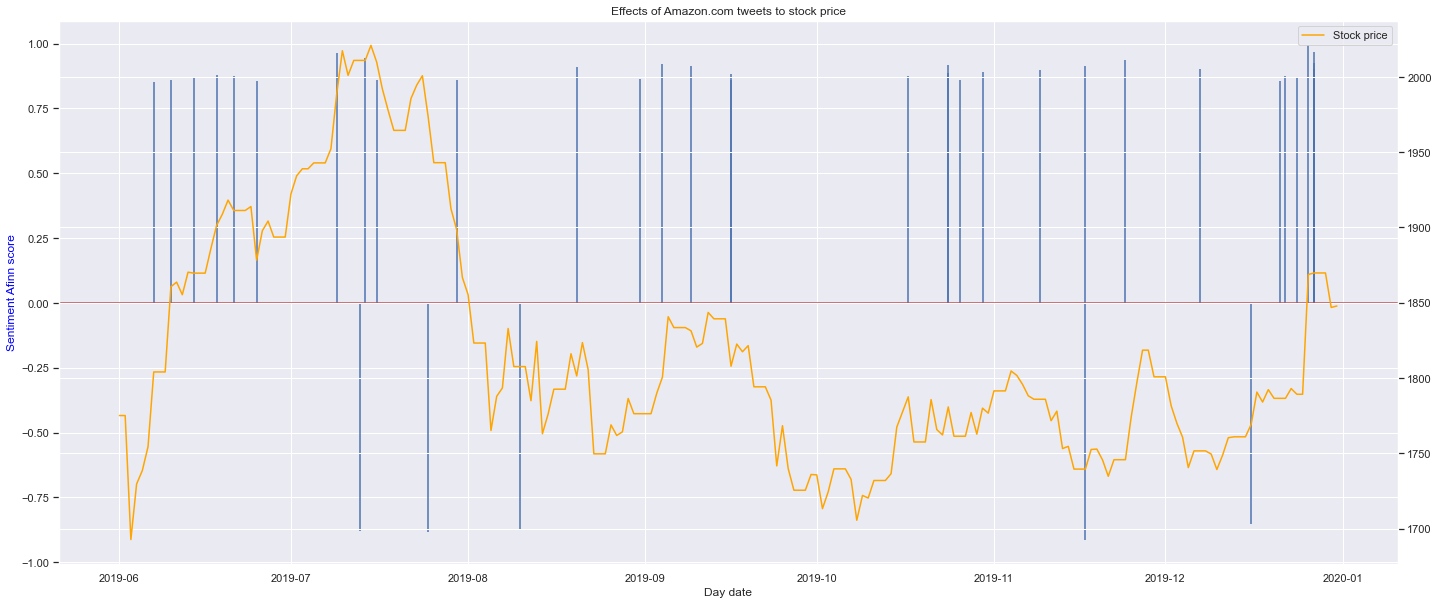

Ticker symbol: GOOG
Stock price of Google Inc company with ticker symbol is GOOG





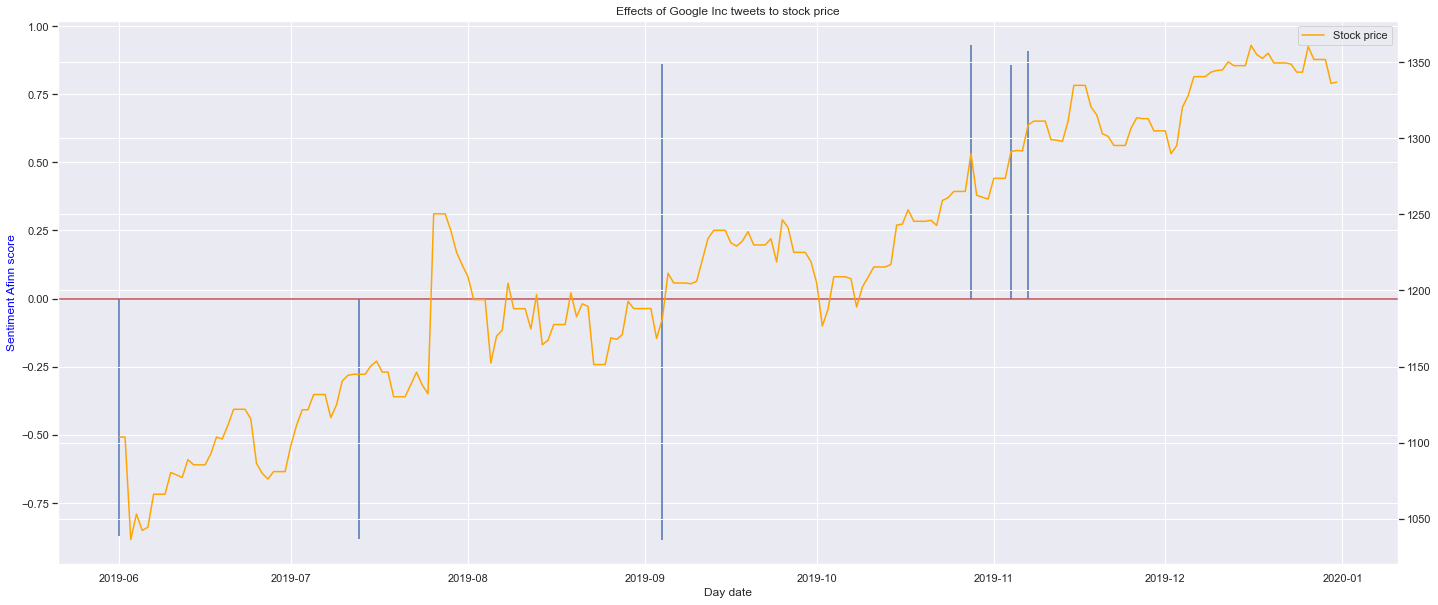

Ticker symbol: GOOGL
Stock price of Google Inc company with ticker symbol is GOOGL





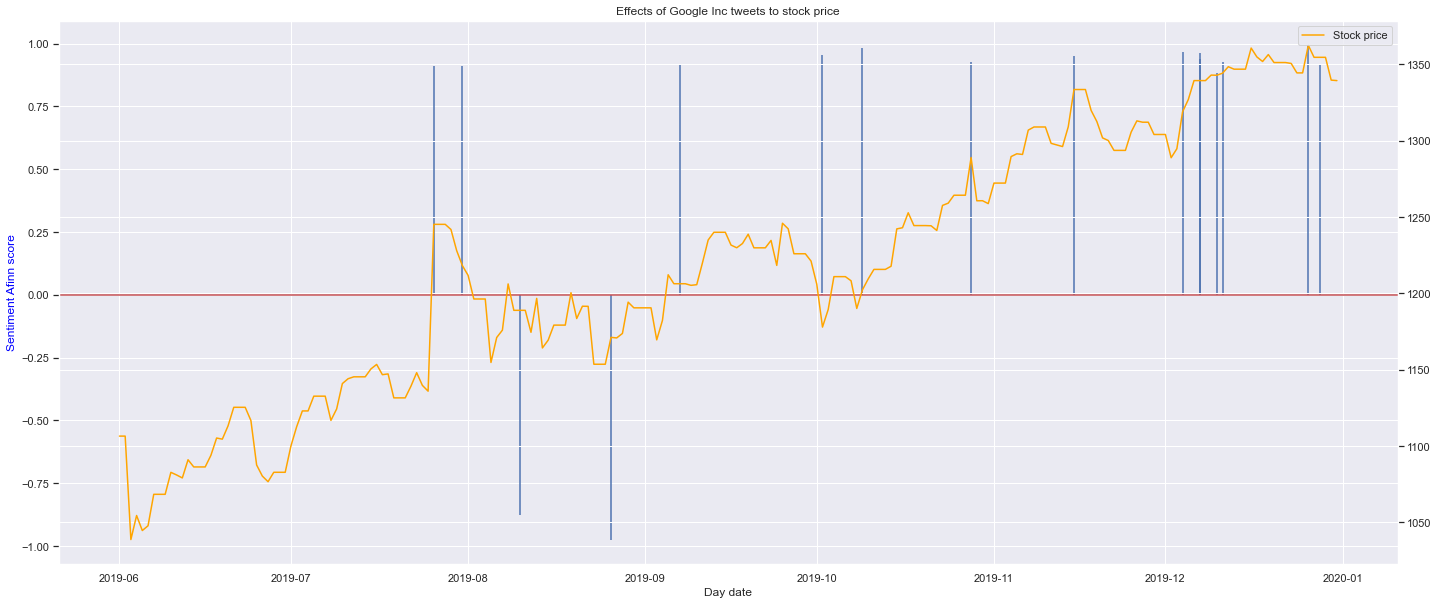

Ticker symbol: MSFT
Stock price of Microsoft company with ticker symbol is MSFT





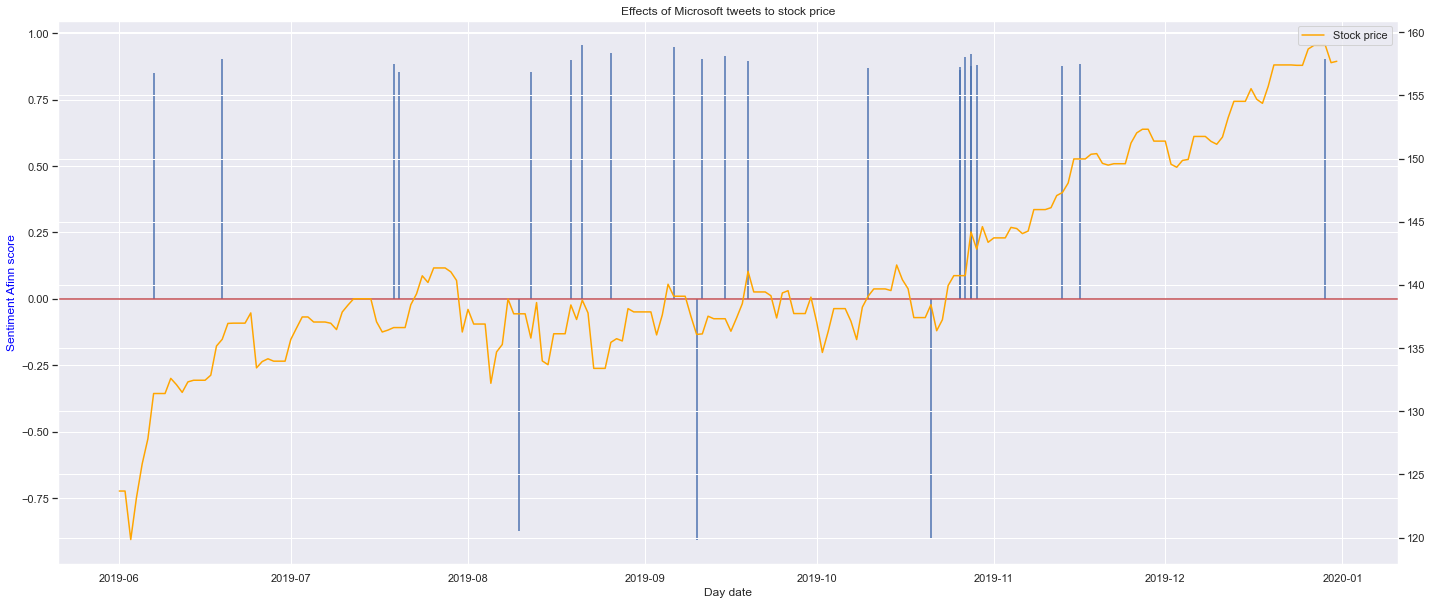

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





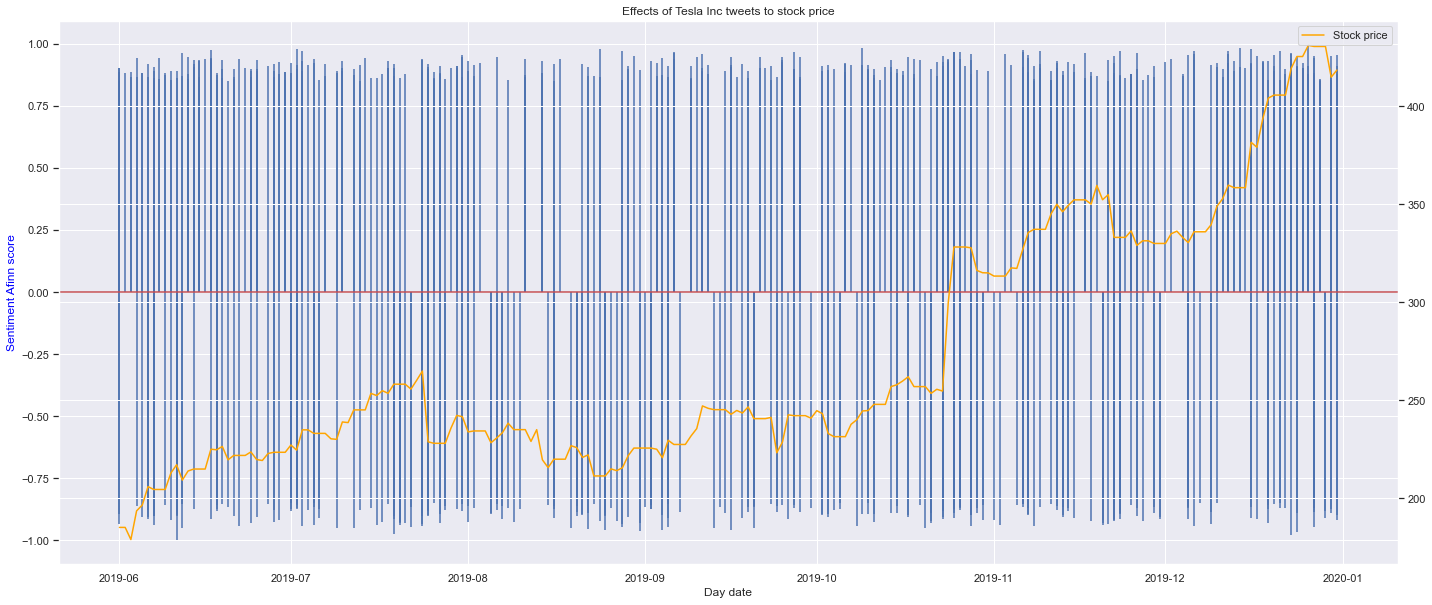

In [77]:
score_threshold = 0.85
tmp_tweet_df = tweet_df[(tweet_df['vander_score']<=-score_threshold) | (tweet_df['vander_score']>=score_threshold)]


draw_stock_price_with_sentiment(tmp_tweet_df, stock_df, start_day, end_day, score_name="vander_score")